<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install joblib
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math

from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## 64 BIT (2253,4016)
features = joblib.load('/content/features_withouttrans.pkl')
labels = joblib.load('/content/labels.pkl')

In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
## 56 BIT (2253,3147)

# features = joblib.load('/content/features56.pkl')
# labels = joblib.load('/content/labels56.pkl')


In [0]:
## 64 BIT (2253,3147)

features = joblib.load('/content/features64.pkl')
labels = joblib.load('/content/labels64.pkl')


In [0]:
## 32 BIT (2253,1035)

# features = joblib.load('/content/features32.pkl')
# labels = joblib.load('/content/labels32.pkl')

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''

In [3]:
# print(features[0])
# print(len(features[0]))
# print(len(features))
print(np.shape(features))

(2253, 11)


In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [6]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10509586108780388986
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13244843618695099649
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11690827301586512688
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15533556361440157204
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
x = tf.placeholder(shape = (None,11), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

wh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((11, 15)))
bh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,15)))

#out

wo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((18,1)))
bo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,1)))


In [7]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(11, input_shape = (11, ), activation = 'relu') )
model.add(Dense(20, activation = 'relu') )
#model.add(Dense(2000, activation = 'relu') )

# model.add(BatchNormalization(axis = -1))
# model.add(Dropout(0.5))
model.add(Dense(1,  activation = 'relu'))

Using TensorFlow backend.
W0723 13:47:41.662892 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 13:47:41.665521 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 13:47:41.670705 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
model.compile(optimizer = Adam(lr = 0.001), loss = 'mse')
model.summary()

W0723 13:47:44.112190 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train_t, y_train_t, validation_split = 0.33, epochs = 300, verbose = 1, batch_size = 32, shuffle = True)

W0723 13:47:46.438807 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0723 13:47:46.541851 140373528487808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1056 samples, validate on 521 samples
Epoch 1/300
1056/1056 [==============================] - 1s 911us/step - loss: 3288.7513 - val_loss: 3633.7341
Epoch 2/300
1056/1056 [==============================] - 0s 129us/step - loss: 3214.4300 - val_loss: 3527.9964
Epoch 3/300
1056/1056 [==============================] - 0s 141us/step - loss: 3050.9480 - val_loss: 3271.9425
Epoch 4/300
1056/1056 [==============================] - 0s 133us/step - loss: 2681.9830 - val_loss: 2750.8199
Epoch 5/300
1056/1056 [==============================] - 0s 131us/step - loss: 2064.6488 - val_loss: 2010.8139
Epoch 6/300
1056/1056 [==============================] - 0s 130us/step - loss: 1361.2752 - val_loss: 1335.7180
Epoch 7/300
1056/1056 [==============================] - 0s 124us/step - loss: 893.6906 - val_loss: 1029.6348
Epoch 8/300
1056/1056 [==============================] - 0s 131us/step - loss: 773.6109 - val_loss: 974.0333
Epoch 9/300
1056/1056 [==============================] - 0s 128us/st

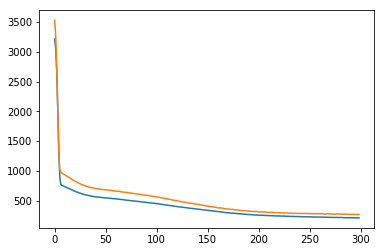

In [10]:
tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [0]:
predicted = model.predict(x_test_t)


In [30]:
print(np.shape(y_test_t))
# print(np.shape(predicted))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
 




(676, 1)


In [31]:
print(np.shape(y_test_t))
rmse = (se/676)**0.5


(676, 1)


In [32]:
print(rmse)

15.566038550729647


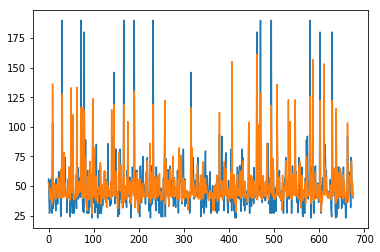

In [28]:
plt.plot(actual)
plt.plot(pred)



In [0]:
plhidl = tf.add(tf.matmul(x,wh),bh, name ='hidden1')

In [0]:
outl_batch = tf.compat.v1.layers.batch_normalization(hidl)
outl = tf.add(tf.matmul(outl_batch,wo),bo,name = 'output')


Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,outl))) + 0.4*tf.reduce_max(tf.subtract(y,outl))
#default lr = 0.001
opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')



In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

4461.7783	3182.7668
3118.7495	2554.766
2507.4658	3275.0693
4539.856	3346.9512
2694.0034	3304.651
2273.4226	2170.648
2329.883	3471.4949
3792.273	2920.608
4059.5378	2707.3484
3911.973	4165.6494
2424.5452	2717.0447
4647.741	2869.6396
2358.3015	2810.48
4182.3677	2243.7874
2161.3186	3399.6826
5336.931	3593.9312
2008.8243	3247.8516
4911.7876	3274.9443
2333.8738	2507.7837
2579.4233	3811.238
2565.7805	2768.688
2827.6204	3399.3972
2418.6797	2533.283
2935.0244	3575.4639
5584.313	2616.47
3253.8489	4434.8037
2831.0798	2795.2852
4836.101	2103.9536
2612.0283	2472.5364
2565.015	3768.0127
3561.174	2203.5781
2623.0466	2520.214
3549.2378	2488.6008
3669.1018	2088.8765
2973.768	2480.9487
3271.0269	3304.757
5563.264	2747.5713
2537.7764	4465.3906
3496.479	3828.913
2044.109	1852.4241
3992.4744	4425.1875
3146.4126	2515.387
2544.1047	2266.586
5300.9307	2058.9448
2016.9991	3723.8315
3398.7932	1960.246
4311.425	3723.6743
2958.96	3214.1042
3090.1316	3556.7124
4295.8213	2557.3403
2402.3118	3318.556
3734.2085	3809.

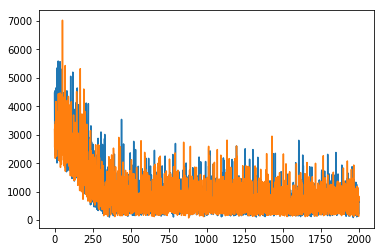

In [40]:
train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(0,2000):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    
    model = simple_save(sess,'/content/drive/My Drive/Custom_Models__withouttransmission/2000',inputs = {'input' : x}, outputs = {'output': outl})
    print('Saved model!')
    
 

In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000_64updhidden.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())

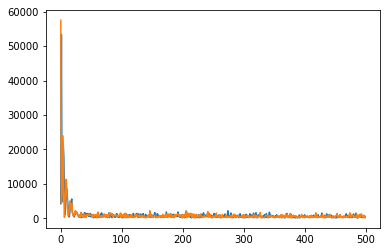

In [0]:
plt.plot(train[1:])
plt.plot(val[1:])

In [41]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(11, 18) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 18) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(18, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(18,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(18,) dtype=float32_ref>]